<h3>Capital Asset Pricing Model (CAMP)</h3>
<p>In finance, the capital asset pricing model (CAPM) is a model used to determine a theoretically appropriate required rate of return of an asset, to make decisions about adding assets to a well-diversified portfolio.</p>

$$
    r_M \sim \mathcal{N}(\alpha + \beta r_A, \varepsilon) \ \forall A
$$

<hr>

<h3>Libraries</h3>

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import minimize
from ipywidgets import interact

%config InlineBackend.figure_format = "retina"

<h3>Dataset</h3>

In [113]:
port_path = "Prueba.xlsx"
market = pd.read_excel(port_path, index_col=0)

<h3>Visualization</h3>

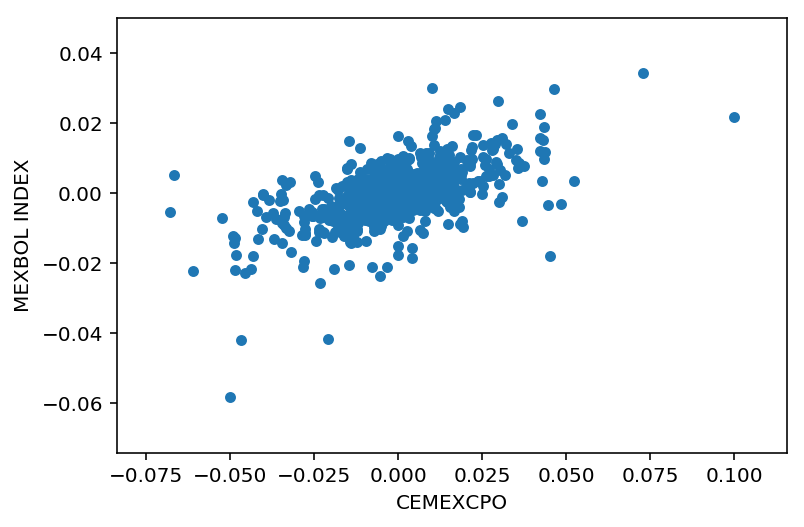

In [16]:
rets = market.pct_change().dropna(axis=0)
rets.columns = [col.replace(" MF Equity", "") for col in rets.columns]
rets.plot.scatter(x="CEMEXCPO", y="MEXBOL INDEX")

<hr>

$$
    {\bf w} = (\Phi^T\Phi)^{-1} \Phi{\bf t}
$$

In [120]:
N = len(rets)
print("N => {}\n".format(N))

Phi = np.c_[np.ones(N), np.ones(N), rets[["KIMBERA", "CEMEXCPO"]].values]
#np.linalg.inv(Phi.T @ Phi)

I = np.concatenate([np.identity(2)] * 2, axis=1)
I = np.concatenate([I] * 2, axis=0)
print("I => \n{}\n".format(I))

N => 672

I => 
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]



In [121]:
Phi = rets.iloc[:, :-1].values
t = rets.iloc[:, [-1]]
N, M = Phi.shape

I = np.concatenate([np.identity(M)] * 2, axis=1)
I = np.concatenate([I] * 2, axis=0)

In [122]:
P = np.ones((N, M))
P = np.c_[P, Phi]

In [123]:
W = np.linalg.inv((P.T @ P) * I) @ P.T @ t
W["security"]  = np.concatenate([rets.columns[:-1]] * 2)
W["param"] = ["alpha"] * M + ["beta"] * M
B = W.pivot_table(index="security", columns="param", values="MEXBOL INDEX")

In [129]:
B.sort_values("beta", ascending=False)

param,alpha,beta
security,,
FEMSAUBD,-0.000168,0.460590
AMXL,-0.000176,0.432599
KOFUBL,0.000011,0.348460
GFNORTEO,-0.000170,0.305996
ASURB,-0.000141,0.300818
WALMEX*,-0.000256,0.294421
BBAJIOO,-0.000183,0.289782
AC*,-0.000002,0.288872
GAPB,-0.000232,0.287803


In [130]:
alpha, beta = B.loc["ASURB"]

In [133]:
@interact(security=rets.columns[:-1])
def plot_capm(security):
    rets.plot.scatter(x=security, y="MEXBOL INDEX")
    sec = rets[security]
    x = np.linspace(sec.min(), sec.max(), 100)
    alpha, beta = B.loc[security]
    plt.title(rf"$\alpha={alpha:0.3f}$ | $\beta={beta:0.3f}$")
    plt.plot(x, alpha + beta * x, c="tab:orange", linewidth=2)

interactive(children=(Dropdown(description='security', options=('KIMBERA', 'GAPB', 'CEMEXCPO', 'ASURB', 'GFNOR…

<h2>Optimización de los pesos</h2>
<hr>
<h3>Dataset</h3>

In [135]:
port_path = "PreciosPortf.xlsx"
data = pd.read_excel(port_path, index_col=0)

rend = data.pct_change().dropna()

rend_ports = rend.mean() * 252
rend_ports

ASURB MF Equity       0.123539
GFNORTEO MF Equity    0.078811
PE&OLES* MF Equity    0.111053
WALMEX* MF Equity     0.082426
IENOVA* MF Equity     0.078997
dtype: float64

In [136]:
rend.cov()

,ASURB MF Equity,GFNORTEO MF Equity,PE&OLES* MF Equity,WALMEX* MF Equity,IENOVA* MF Equity
ASURB MF Equity,0.000224,0.000086,0.000061,0.000036,0.000044
GFNORTEO MF Equity,0.000086,0.000341,0.000094,0.000082,0.000082
PE&OLES* MF Equity,0.000061,0.000094,0.000548,0.000041,0.000045
WALMEX* MF Equity,0.000036,0.000082,0.000041,0.000215,0.000043
IENOVA* MF Equity,0.000044,0.000082,0.000045,0.000043,0.000226


In [137]:
weights = np.random.random(5)
weights /= sum(weights)
weights

array([0.23439091, 0.04952594, 0.29801318, 0.18791826, 0.23015172])

In [138]:
sum(weights)

1.0

In [139]:
# rendimiento esperado (anualizado) de portafolio
(rend.mean() * weights).sum() * 252

0.09962567176576378

In [140]:
E_p = (rend.mean() @ weights) * 252
S_p = np.sqrt(weights.T @ (rend.cov() * 252) @ weights)

In [141]:
E_p, S_p

(0.09962567176576378, 0.17415221548958384)

In [142]:
def port_rend(weights, r):
    E_p = (r.mean() @ weights) * 252
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov() * 252) @ weights)
    return S_p

In [143]:
port_rend(weights, rend), port_vol(weights, rend)

(0.09962567176576378, 0.17415221548958384)

In [144]:
weights_sim = np.random.random((5000, 5))
weights_sim = weights_sim / weights_sim.sum(axis=1, keepdims=True)

rend_sim = np.apply_along_axis(port_rend, 1, weights_sim, r=rend)
vol_sim = np.apply_along_axis(port_vol, 1, weights_sim, r=rend)

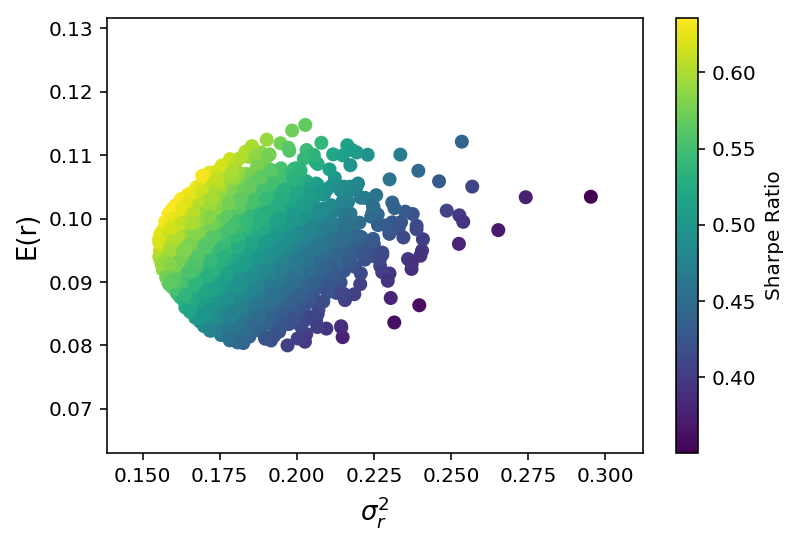

In [145]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

<h2>Creando la frontera eficiente</h2>
<hr>

<h3>Efficient frontier</h3>
<p>The CAPM assumes that the risk-return profile of a portfolio can be optimized—an optimal portfolio displays the lowest possible level of risk for its level of return. Additionally, since each additional asset introduced into a portfolio further diversifies the portfolio, the optimal portfolio must comprise every asset, (assuming no trading costs) with each asset value-weighted to achieve the above (assuming that any asset is infinitely divisible). All such optimal portfolios, i.e., one for each level of return, comprise the efficient frontier.</p>
<p>Because the unsystematic risk is diversifiable, the total risk of a portfolio can be viewed as beta.</p>

$$
\begin{aligned}
    \min \ &{\bf w}^T\Sigma {\bf w} \\
    s.t.\ & {\bf w}^T {\bf 1} = 1 \\
\end{aligned}
$$

In [147]:
N, M = rend.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0

constraints = [
    {"type": "eq", "fun": sum_weights}
]

port0 = minimize(port_vol, w0, constraints=constraints, args=rend)
port0

     fun: 0.1551619063767472
     jac: array([0.15516467, 0.155046  , 0.155072  , 0.15518148, 0.1551849 ])
 message: 'Optimization terminated successfully.'
    nfev: 71
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.28191496, 0.04391315, 0.08977843, 0.30815719, 0.27623626])

In [148]:
wp0 = port0.x
port_rend(wp0, rend), port_vol(wp0, rend)

(0.09548056435313121, 0.1551619063767472)

TypeError: You must first set_array for mappable

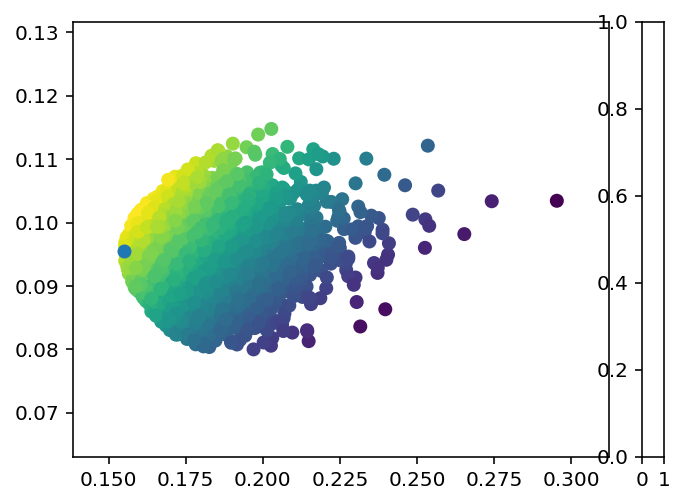

In [149]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.scatter(port_vol(wp0, rend), port_rend(wp0, rend))
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

<h3>Optimización sujeta a un rendimiento esperado</h3>

$$
\begin{aligned}
    \min \ &{\bf w}^T\Sigma {\bf w} \\
    s.t.\ & {\bf w}^T {\bf 1} = 1 \\
    &{\bf w}^T R_p = E
\end{aligned}
$$

In [150]:
N, M = rend.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0

def rend_esperado(w, E):
    return port_rend(w, rend) - E # == 0

e0 = 0.1
constraints = [
    {"type": "eq", "fun": sum_weights},
    {"type": "eq", "fun": lambda w: rend_esperado(w, e0)}
]

port1 = minimize(port_vol, w0, constraints=constraints, args=rend)
port1

     fun: 0.157151653014521
     jac: array([0.17779244, 0.1387804 , 0.16671833, 0.1418337 , 0.13867591])
 message: 'Optimization terminated successfully.'
    nfev: 78
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.37292439, 0.00714288, 0.10719904, 0.27910893, 0.23362476])

In [151]:
wp1 = port1.x
port_rend(wp1, rend), port_vol(wp1, rend)

(0.10000000000089973, 0.157151653014521)

TypeError: You must first set_array for mappable

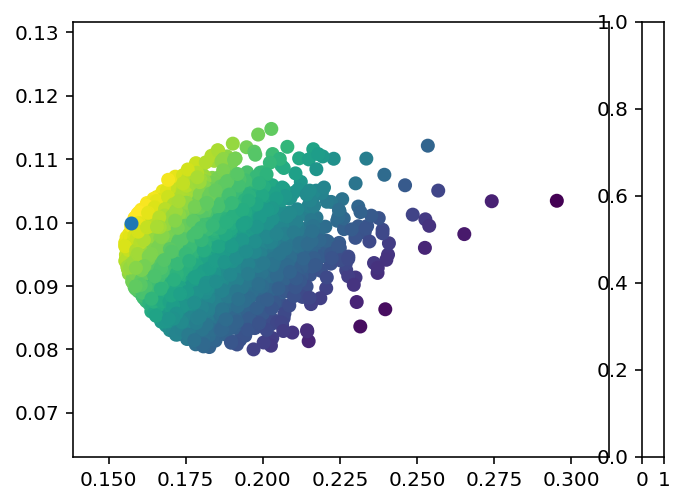

In [152]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.scatter(port_vol(wp1, rend), port_rend(wp1, rend))
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

In [154]:
rend_maxs = np.linspace(5, 10)

In [155]:
r_min = port_rend(wp0, rend)
r_max = rend_ports.max()

rend_max = np.linspace(r_min, r_max)

In [156]:
pesos_optimos = []

for e in rend_max:
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w: rend_esperado(w, e)}
    ]

    port1 = minimize(port_vol, w0, constraints=constraints, args=rend)
    w_opt = port1.x
    pesos_optimos.append(w_opt)

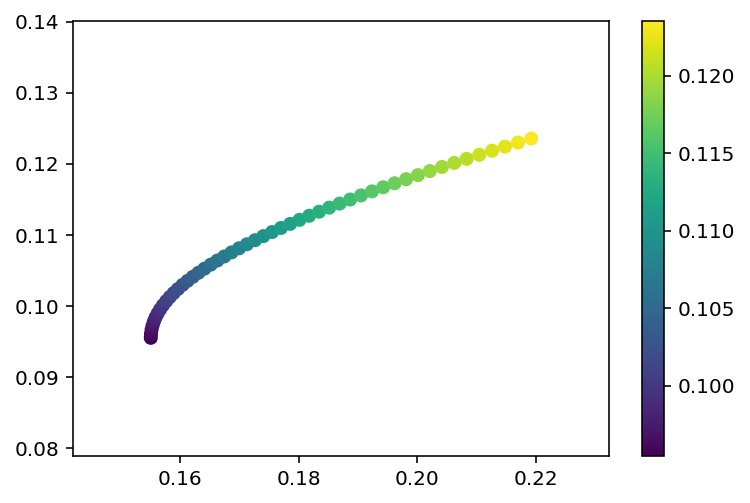

In [157]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w, rend))
    v_opt.append(port_vol(w, rend))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c=r_opt)
plt.colorbar()

<h3>Portafolio Tangencial</h3>

$$
    \mathbb{E}[R_C] = R_f + \frac{\mathbb{E}[R_p] - R_f}{\sigma_P}\sigma_C
$$

$$
\frac{\mathbb{E}[R_p] - R_f}{\sigma_P}
$$

In [158]:
rf = 0.06

def min_func_sharpe(weights):
    return - (port_rend(weights, rend) - rf) / port_vol(weights, rend)

constraints = [
    {"type": "eq", "fun": sum_weights}
]

f_sharpe = minimize(min_func_sharpe, w0, constraints=constraints)

In [159]:
w_sharpe = f_sharpe.x

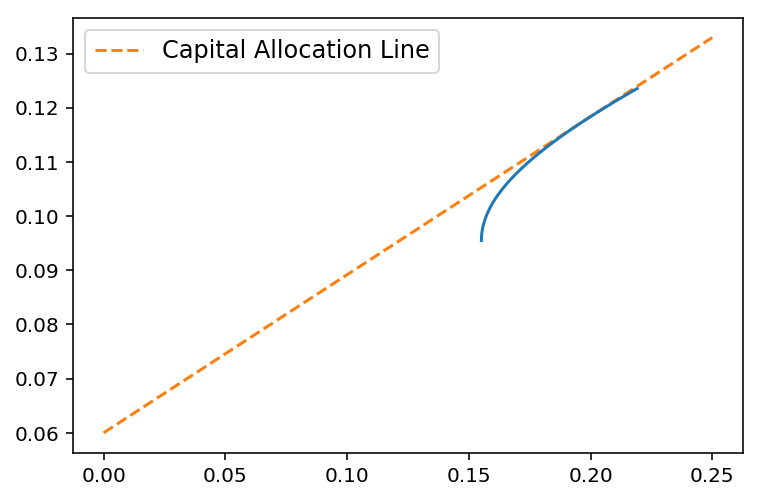

In [160]:
e_sharpe = port_rend(w_sharpe, rend)
vol_sharpe = port_vol(w_sharpe, rend)

sigma_c =  np.linspace(0, 0.25)
sharpe = rf + sigma_c * (e_sharpe - rf) / vol_sharpe

plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.legend(fontsize=12)